# ÖDEV 1: PCA yardımı ile Classification,

Bu ödevde "Credit Risk Prediction" veri setini kullanacağız. Amacımız, verinin boyut sayısını düşürerek olabildiğince yüksek accuracy değerini alabilmek. Aşağıda verinin okunma ve temizlenme kısmını hazırlayıp vereceğim. Devamında ise yapmanız gerekenler:

1. PCA kullanarak verinin boyutunu düşürmek
    * Önce explained varience ratio değerini inceleyerek veriyi kaç boyuta düşürebileceğini kontrol et.
    * Daha sonra farklı boyutlarda denemeler yaparak boyutu düşürülmüş verileri elde et.
2. Classification modellerini dene
    * Logistic Regression
    * Random Forest
    * ve eğer istersen herhangi bir modelle daha

İsteğe bağlı olarak, verinin boyutunu düşürmek için diğer yöntemleri de kullanıp en yüksek accuracy değerini almayı deneyebilirsin.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df: pd.DataFrame = pd.read_csv('./credit_risk_dataset.csv')

In [3]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [4]:
# Null değerleri sütun ortalaması ile dolduruyoruz
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

In [5]:
df.duplicated().sum()

165

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,32416.0,4.768880,4.090411,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,32416.0,11.014662,3.083050,5.42,8.49,10.99,13.11,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


In [8]:
# Outlier temizliği
df = df[df['person_age']<=100]
df = df[df['person_emp_length'] <= 60]
df = df[df['person_income']<=4e6]

In [9]:
# Kategorik verileri alıyoruz ve one hot encoding haline getiriyoruz
cat_cols = pd.DataFrame(df[df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [10]:
encoded_cat_cols = pd.get_dummies(cat_cols)
df.drop(df.select_dtypes(include=['object']).columns, axis=1,inplace=True)
df = pd.concat([df,encoded_cat_cols], axis=1)

In [11]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

In [12]:
# Verileri train ve test olarak ikiye ayırıyoruz
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(1, test_size=0.1)
train_idx, test_idx = next(split.split(X, y))
train_x = X[train_idx]
test_x = X[test_idx]

train_y = y[train_idx]
test_y = y[test_idx]

In [13]:
print(X.shape)
X[:5]

(32409, 26)


array([[2.100e+01, 9.600e+03, 5.000e+00, 1.000e+03, 1.114e+01, 1.000e-01,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00],
       [2.500e+01, 9.600e+03, 1.000e+00, 5.500e+03, 1.287e+01, 5.700e-01,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00],
       [2.300e+01, 6.550e+04, 4.000e+00, 3.500e+04, 1.523e+01, 5.300e-01,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00],
       [2.400e+01, 

### PCA ile Boyut İndirgeme

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
X_reconstruct = pca.fit_transform(X)

In [15]:
pca.components_.shape

(26, 26)

In [16]:
pca.explained_variance_ratio_

array([9.87172378e-01, 1.28275928e-02, 1.84908111e-08, 5.38665689e-09,
       3.36822929e-09, 9.91999801e-10, 1.45298012e-10, 1.26578503e-10,
       6.87390238e-11, 6.80322915e-11, 6.49009692e-11, 6.20949120e-11,
       5.91916321e-11, 5.05450070e-11, 4.17747291e-11, 3.70992460e-11,
       2.14124883e-11, 7.92954529e-12, 2.74169803e-12, 1.63947111e-12,
       1.54524841e-12, 7.78274858e-13, 9.66102379e-33, 9.66102379e-33,
       9.66102379e-33, 9.66102379e-33])

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.98717238, 0.99999997, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [18]:
# Boyutu 26'dan 3'e indirgeme
pca = PCA(n_components=3)
X3D = pca.fit_transform(X)

In [19]:
X3D[:5]

array([[-5.65839594e+04,  6.41342435e+03, -6.42357893e+00],
       [-5.64102832e+04,  1.91677711e+03, -3.02843891e+00],
       [ 5.86611790e+02, -2.54038006e+04, -6.38583582e+00],
       [-1.05051180e+04, -2.58322018e+04, -3.81769988e+00],
       [-5.62262909e+04,  4.92612079e+03, -6.80564634e+00]])

In [20]:
# 3 boyutlu veri kümesinin yeniden yapılandırılması
X_reconstructed = pca.inverse_transform(X3D)

In [21]:
X_reconstructed

array([[ 2.13196391e+01,  9.60000001e+03,  3.07553864e+00, ...,
        -1.20742787e-03,  8.41143150e-01,  1.58856850e-01],
       [ 2.42224168e+01,  9.59999998e+03,  3.66460724e+00, ...,
         6.74290478e-04,  8.28202421e-01,  1.71797579e-01],
       [ 2.25290284e+01,  6.55000000e+04,  5.13894383e+00, ...,
         1.18152481e-02,  7.56785062e-01,  2.43214938e-01],
       ...,
       [ 6.38566997e+01,  7.59999999e+04,  1.08591665e+01, ...,
         1.32391276e-02,  7.45332965e-01,  2.54667035e-01],
       [ 5.67835016e+01,  1.50000000e+05,  9.61795164e+00, ...,
         4.50669718e-03,  8.10330843e-01,  1.89669157e-01],
       [ 6.54616082e+01,  4.19999999e+04,  9.58679034e+00, ...,
         2.30758196e-03,  8.16915810e-01,  1.83084190e-01]])

In [22]:
np.mean(np.sum(np.square(X_reconstructed - X), axis = 1))

29.399046291578074

In [23]:
pca.components_.shape

(3, 26)

In [24]:
np.sum(pca.explained_variance_ratio_)

0.999999989492814

In [25]:
cumsum_data = np.cumsum(pca.explained_variance_ratio_)

In [26]:
x_tick = np.arange(1, len(cumsum_data)+1,1)

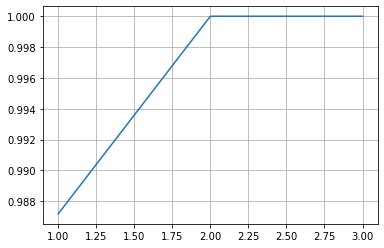

In [27]:
# PCA'nın görselleştirilmesi
plt.grid(True)
plt.plot(x_tick,cumsum_data)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [30]:
# Lojistik Regresyon kesinlik hesaplaması
lr = LogisticRegression()
lr.fit(train_x,train_y)
print("accuracy {}".format(lr.score(x_test,y_test)))

accuracy 0.8040728170317804


In [31]:
# Karar Ağacı algoritması ile kesinlik hesaplaması
dtc = DecisionTreeClassifier()
dtc.fit(train_x,train_y)
print("result: ", dtc.score(x_test,y_test))

result:  0.9876581302067263


In [32]:
# Rastgele Orman algoritması ile kesinlik hesaplaması
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(x_train,y_train)
print("result: ",rfc.score(x_test,y_test))

result:  0.9355137303301451


### Diğer Boyut Düşürme Teknikleri

In [33]:
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
from sklearn.manifold import MDS

Veri setinde çok fazla veri olduğundan dolayı görselleştirme için çok fazla ram gerekli, bu sebeple veri setini azaltmamız gerekiyor.

In [34]:
df = df.sample(frac=0.1)

In [35]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

In [36]:
split = StratifiedShuffleSplit(1, test_size=0.1)
train_idx, test_idx = next(split.split(X, y))
train_x = X[train_idx]
test_x = X[test_idx]

train_y = y[train_idx]
test_y = y[test_idx]

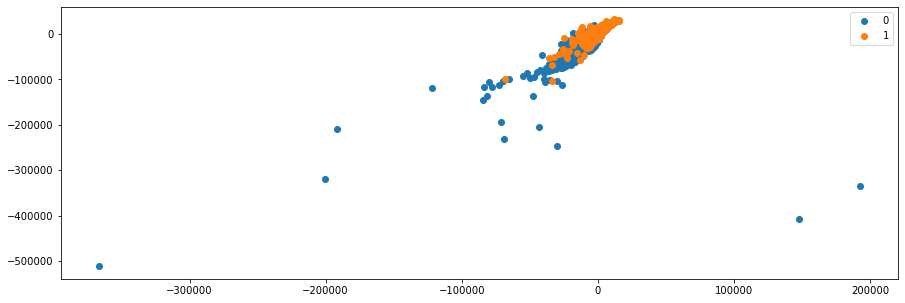

In [37]:
# MDS
mds = MDS(n_components=3)
X3D = mds.fit_transform(X)
figure = plt.figure(1,(15,5))
for label in set(y):
    data = X3D[y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

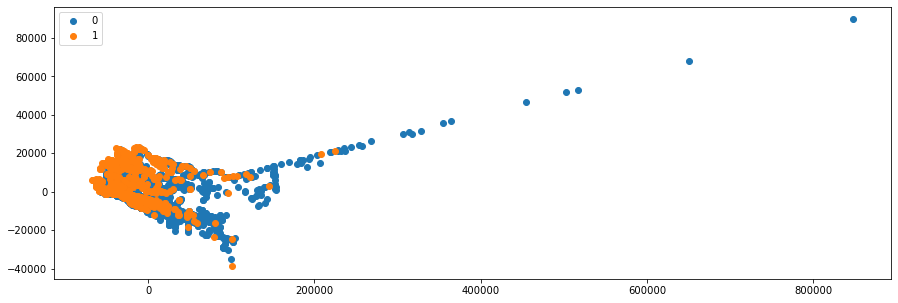

In [38]:
# Isomap
from sklearn.manifold import Isomap

isomap = Isomap(n_components=3)
X3D = isomap.fit_transform(X)
figure = plt.figure(1,(15,5))
for label in set(y):
    data = X3D[y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

/Users/rdemirbay/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rdemirbay/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


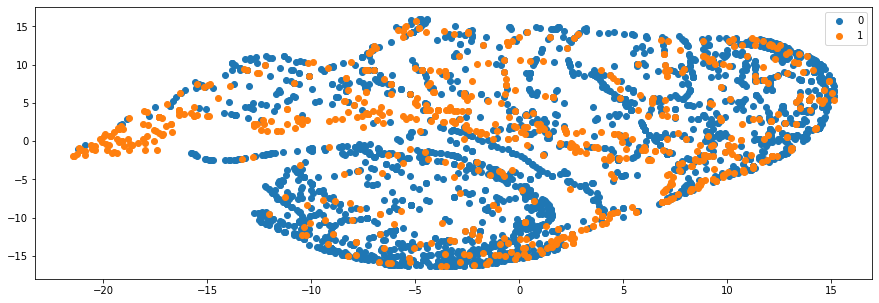

In [39]:
# TSNE
tsne = TSNE(n_components = 3)
X_3D = tsne.fit_transform(X)
figure = plt.figure(1,(15,5))

for label in set(y):
    data = X_3D[y==label]
    plt.scatter(data[:,0],data[:,1], label = label)
plt.legend()
plt.show()

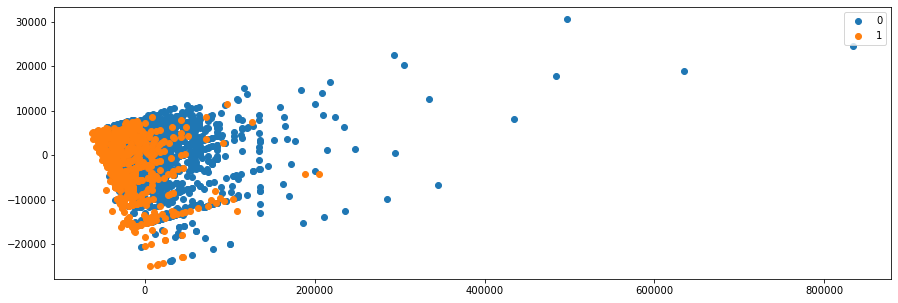

In [40]:
pca = PCA(n_components=3)
X3D = pca.fit_transform(X,y)
figure = plt.figure(1,(15,5))
for label in set(y):
    data = X3D[y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()


/Users/rdemirbay/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rdemirbay/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


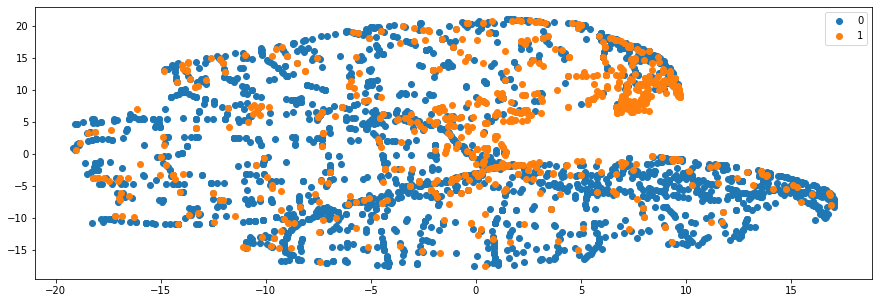

In [41]:
"""It is highly recommended to use another dimensionality reduction
    method (e.g. PCA for dense data or TruncatedSVD for sparse data)
    to reduce the number of dimensions to a reasonable amount (e.g. 50)
    if the number of features is very high. This will suppress some
    noise and speed up the computation of pairwise distances between
    samples. For more tips see Laurens van der Maaten's FAQ [2]. 
    (From Sklearn documentation)"""

pca = PCA(n_components=0.99)
X_reduced = pca.fit_transform(X,y)


tsne = TSNE(n_components=3)
X3D = tsne.fit_transform(X_reduced)

figure = plt.figure(1,(15,5))
for label in set(y):
    data = X3D[y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()